In [ ]:
# FA24-BBD-069
# Noor-UL-Ain Zahid


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [8]:
conn= sqlite3.connect("chinook.db")

In [78]:
#Q1
hr_df = pd.read_csv("hr_dataset_original.csv")


In [10]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [80]:
#q2
print("Dataset information:")
display(hr_df.info())
print("Datset description:")
display(hr_df.describe())
# Interpretation :
#describe will give numerical columns description by default .it Gives total counts,means,standarddeviation etc of numerical columns
display(hr_df.shape)
# it has 14990 rows and 10 columns


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


None

Datset description:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


(14999, 10)

In [20]:
#q3
hr_df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [26]:
#q3
display(hr_df.duplicated().sum())
# Total 3008 duplicates
hr_df.drop_duplicates()
#duplicated removed

3008

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


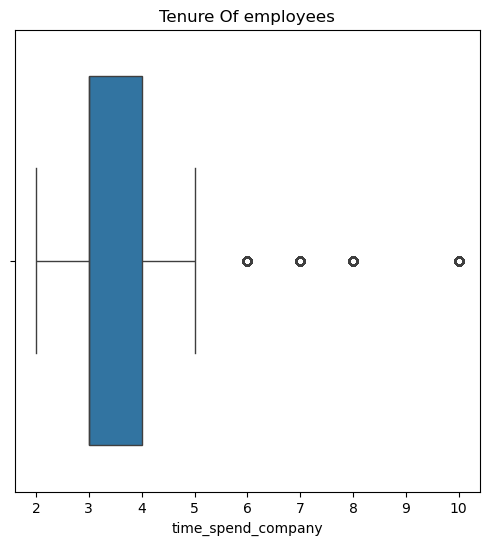

In [31]:
#Q4

plt.figure(figsize=(6,6))
sns.boxplot(x=hr_df["time_spend_company"])
plt.title("Tenure Of employees")
plt.show()
# OUTLIERS at 6,7,8,10 years

In [35]:
#Q5(a)
lefts= hr_df["left"].value_counts()
# 0: 11428 stayed
# 1: 3571 left
print("Number of employees who left nad who stayed")
print(lefts)
print("Percentages:")
print(lefts/len(hr_df))
# 76% stayed
# 23% left

Number of employees who left nad who stayed
left
0    11428
1     3571
Name: count, dtype: int64
Percentages:
left
0    0.761917
1    0.238083
Name: count, dtype: float64


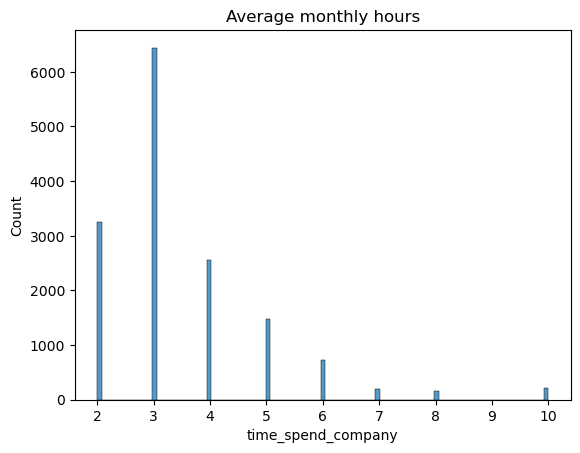

In [83]:
#Q5(b)
sns.histplot(x=hr_df["time_spend_company"])
plt.title("Average monthly hours")
plt.show()

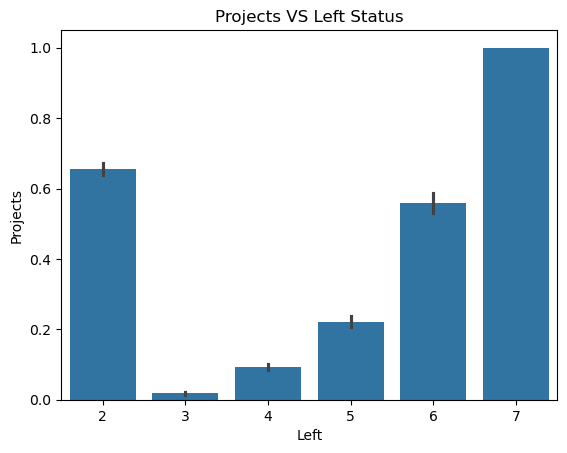

In [44]:
#Q5(c)
sns.barplot(x=hr_df["number_project"],y=hr_df["left"])
plt.title("Projects VS Left Status")
plt.xlabel("Left")
plt.ylabel("Projects")
plt.show()

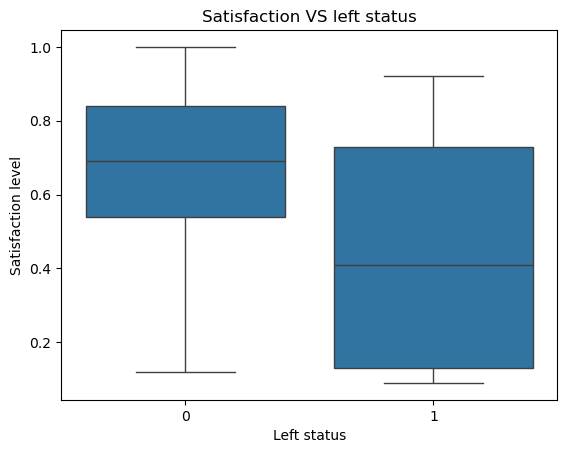

In [48]:
#d)
sns.boxplot(x=hr_df["left"],y=hr_df["satisfaction_level"])
plt.title("Satisfaction VS left status")
plt.xlabel("Left status")
plt.ylabel("Satisfaction level")
plt.show()

In [77]:
#Q6
encoded_dataset = hr_df.select_dtypes(include="object")
for col in encoded_dataset:
    hr_df[col]=le.fit_transform(hr_df[col])
print(encoded_dataset)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(encoded_dataset)
#Q7
X=hr_df.drop(["left"])
y=hr_df["left"]
#Q8
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model= LogisticRegression(max_iter=1000)
model.fit_transform(X_train,y_train)
y_pred= model.predict(X_test)
print("/nAccuracy: /n",accuracy_score(y_test,y_pred))
print("/nConfusion_matrix:/n",confusion_matrix(y_test,y_pred))
print("/nClassification :/n", classification_report(y_test,y_pred))
#Q9
#Accuracy : shows how much accurate is the model predict
# Confusion matrix shows how much machine model predicted correct or wrong 
# Classification show recall, precision etc 

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[14999 rows x 0 columns]


ValueError: at least one array or dtype is required

In [ ]:
# Q10:
#(a)
dataset_basket=[
    ["Milk","Bread","Butter","Cheese","Apple","Orange"],
    ["Bread","Diapers","Eggs","Banana","Cheese"],
    ['Milk','Diapers','Cola','Banana','Apple'],
    ["Bread","Butter","Diapers","Apple","Orange"],
    ["Milk",'Bread',"Butter","Cheese"]
]
#(a)
transaction=dataset_basket.select_dtypes(include="all").columns
te=TransactionEncoder()
transaction = te.fit(dataset_basket)

#(b)
frequent_itemsets = apriori(transaction,min_support=0.6,min_threshold=0.01)
#(c)
rules= association_rules(frequent_itemsets,matrix="confidence",min_threshold=0.7)
#(d)
print("Frequent_itemsets:")
print(frequent_itemsets )
print(rules[["antecedents","consequents","confidence","support","lift"]])
#(e)
#concequent is 2nd item after one item selected
# confidence: Chances of selection of other item if one selected
# support: how much chance of selection of both items combination

In [56]:
#Q11:(a)
query = """SELECT name FROM sqlite_master WHERE type='table'"""
pd.read_sql_query(query,conn)



,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists


In [58]:
#Q11(b):
query="""SELECT employees.FirstName,employees.LastName
From employees"""
pd.read_sql_query(query,conn)

,FirstName,LastName
0,Andrew,Adams
1,Nancy,Edwards
2,Jane,Peacock
3,Margaret,Park
4,Steve,Johnson
5,Michael,Mitchell
6,Robert,King
7,Laura,Callahan


In [60]:
#Q11(c):
query= """SELECT Country,COUNT(*) AS TotalCustomers
FROM customers
GROUP BY Country
ORDER BY TotalCustomers DESC"""
pd.read_sql_query(query,conn)


,Country,TotalCustomers
0,USA,13
1,Canada,8
2,France,5
3,Brazil,5
4,Germany,4
5,United Kingdom,3
6,Portugal,2
7,India,2
8,Czech Republic,2
9,Sweden,1


In [67]:
query="""SELECT * FROM invoices"""
pd.read_sql_query(query,conn)


,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86


In [70]:
#Q11(d):


query="""SELECT invoices.InvoiceId,invoice_items.InvoiceId
FROM invoices 
INNER JOIN invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
"""
pd.read_sql_query(query,conn)


,InvoiceId,InvoiceId
0,98,98
1,98,98
2,121,121
3,121,121
4,121,121
...,...,...
2235,284,284
2236,284,284
2237,284,284
2238,284,284


In [62]:
query = """SELECT * FROM invoice_items"""
pd.read_sql_query(query,conn)

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1
...,...,...,...,...,...
2235,2236,411,3136,0.99,1
2236,2237,411,3145,0.99,1
2237,2238,411,3154,0.99,1
2238,2239,411,3163,0.99,1
